In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [2]:
inpatient_df = pd.read_csv('idea-1/medicare-data/medicare-data/Inpatient_provdr.csv')
outpatient_df = pd.read_csv('idea-1/medicare-data/medicare-data/Outpatient_provdr.csv')

### Check whether the number of states for inpatient and outpatient cares is the same

In [8]:
inp_states = inpatient_df['Provider State']
inp_states = inp_states.unique()
print('Number of states with inpatient care:', len(inp_states))

outp_states = outpatient_df['Provider State']
outp_states = outp_states.unique()
print('Number of states with outpatient care:', len(outp_states))

if len(inp_states) > len(outp_states):
    print('State(s) with inpatient care but not outpatient care:', set(inp_states).difference(outp_states))
else:
    print('State(s) with outpatient care but not inpatient care:', set(outp_states).difference(inp_states))
# in_not_out = set(inp_states).difference(outp_states)
# in_not_out

Number of states with inpatient care: 51
Number of states with outpatient care: 50
State(s) with inpatient care but not outpatient care: {'MD'}


### Average Total Payments for inpatient care in each States

<Figure size 2160x576 with 0 Axes>

<AxesSubplot:xlabel='States', ylabel='Average Total Payments'>

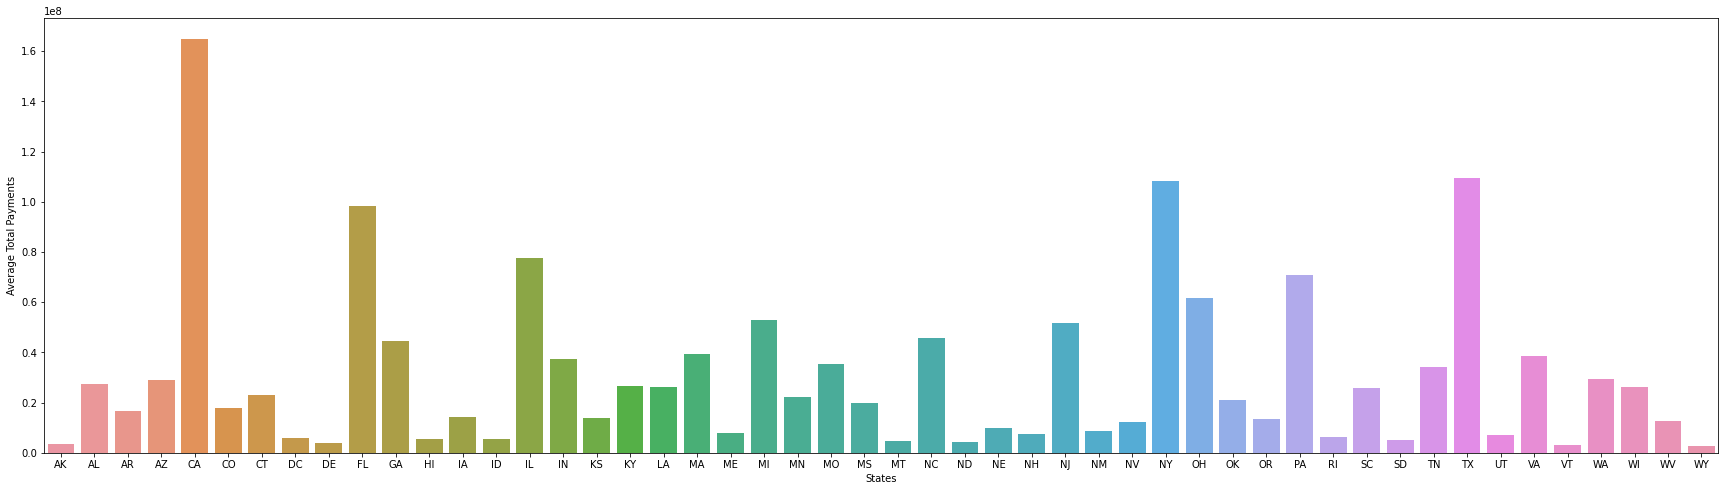

In [10]:
inp_state_new = inpatient_df[inpatient_df['Provider State'] != 'MD']
inp_state_cost = inp_state_new.groupby('Provider State')['Average Total Payments'].sum().reset_index()

inp_state_com = {'States': inp_state_cost['Provider State'], 'Average Total Payments': inp_state_cost['Average Total Payments']}
inp_state_df = pd.DataFrame(inp_state_com)

plt.figure(figsize=(30,8))
sns.barplot(data=inp_state_df, x='States', y='Average Total Payments')

### Average Total Payments for outpatient care in each States

<Figure size 2160x576 with 0 Axes>

<AxesSubplot:xlabel='States', ylabel='Average Total Payments'>

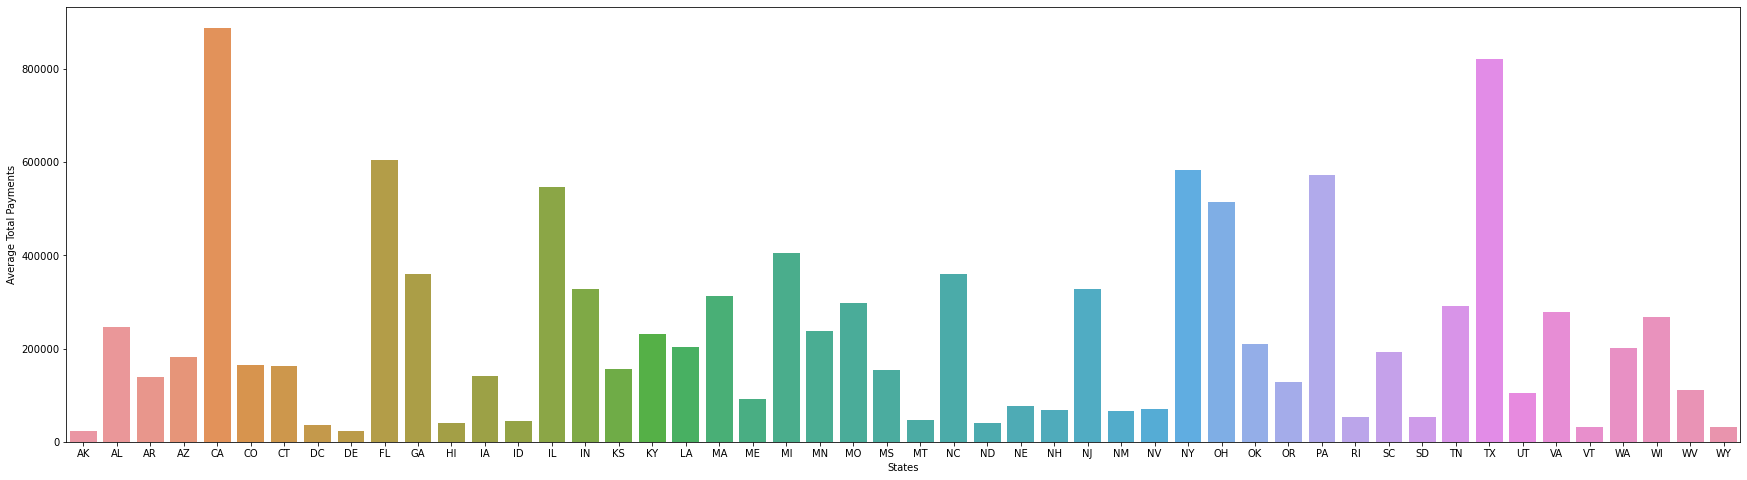

In [12]:
outp_state_cost = outpatient_df.groupby('Provider State')['Average Total Payments'].sum().reset_index()

outp_state_com = {'States': outp_state_cost['Provider State'], 'Average Total Payments': outp_state_cost['Average Total Payments']}
outp_state_df = pd.DataFrame(outp_state_com)

plt.figure(figsize=(30,8))
sns.barplot(data=outp_state_df, x='States', y='Average Total Payments')

### Difference in Average Total Payments between inpatient and outpatient care in each States

<Figure size 2160x576 with 0 Axes>

<AxesSubplot:xlabel='States', ylabel='Cost Differences'>

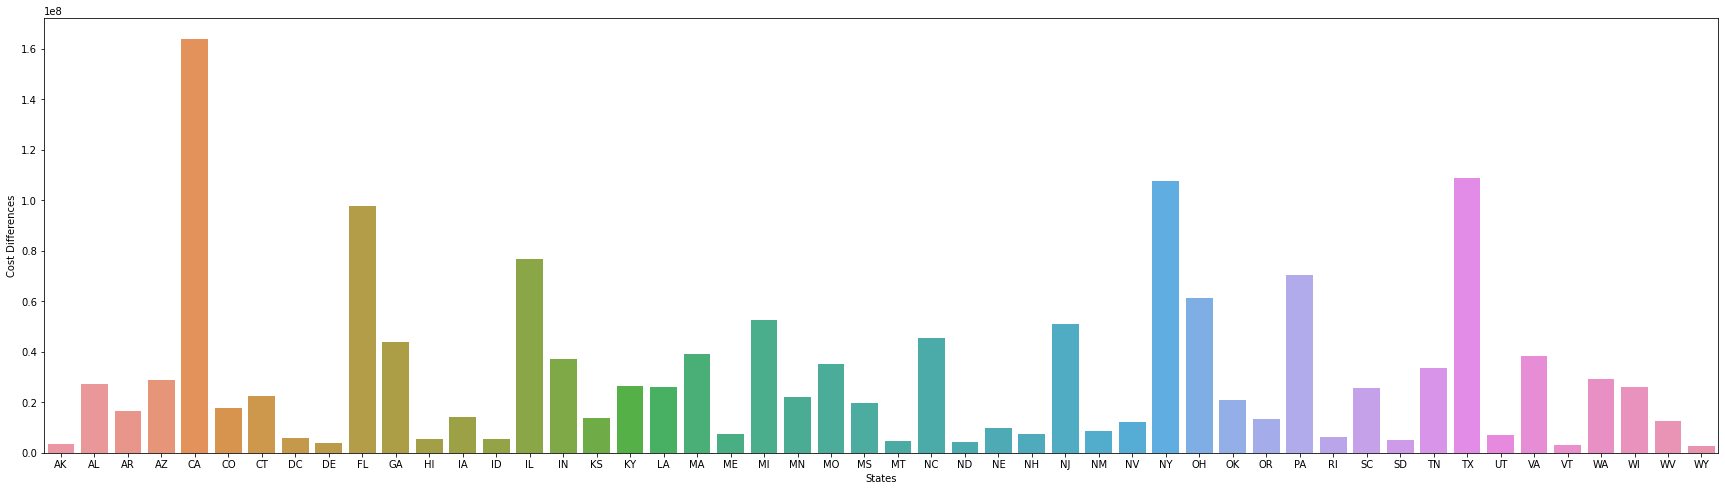

In [15]:
state_diff = inp_state_cost['Average Total Payments'] - outp_state_cost['Average Total Payments']

df = {'States': outp_state_cost['Provider State'], 'Cost Differences': state_diff}
state_cost_comp = pd.DataFrame(df)

plt.figure(figsize=(30,8))
sns.barplot(data=state_cost_comp, x='States', y='Cost Differences')